<a href="https://colab.research.google.com/github/AYUSH-SHARMA25/HEALTH-INSURANCE-CROSS-SELL-PREDICTION/blob/main/HEALTH_INSURANCE_CROSS_SELL_PREDICTION_CAPSTONE_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

Our client is an Insurance company that has provided Health Insurance to its customers now they need your help in building a model to predict whether the policyholders (customers) from past year will also be interested in Vehicle Insurance provided by the company.

An insurance policy is an arrangement by which a company undertakes to provide a guarantee of compensation for specified loss, damage, illness, or death in return for the payment of a specified premium. A premium is a sum of money that the customer needs to pay regularly to an insurance company for this guarantee.

For example, you may pay a premium of Rs. 5000 each year for a health insurance cover of Rs. 200,000/- so that if, God forbid, you fall ill and need to be hospitalised in that year, the insurance provider company will bear the cost of hospitalisation etc. for upto Rs. 200,000. Now if you are wondering how can company bear such high hospitalisation cost when it charges a premium of only Rs. 5000/-, that is where the concept of probabilities comes in picture. For example, like you, there may be 100 customers who would be paying a premium of Rs. 5000 every year, but only a few of them (say 2-3) would get hospitalised that year and not everyone. This way everyone shares the risk of everyone else.

Just like medical insurance, there is vehicle insurance where every year customer needs to pay a premium of certain amount to insurance provider company so that in case of unfortunate accident by the vehicle, the insurance provider company will provide a compensation (called ‘sum assured’) to the customer.

Building a model to predict whether a customer would be interested in Vehicle Insurance is extremely helpful for the company because it can then accordingly plan its communication strategy to reach out to those customers and optimise its business model and revenue.

Now, in order to predict, whether the customer would be interested in Vehicle insurance, you have information about demographics (gender, age, region code type), Vehicles (Vehicle Age, Damage), Policy (Premium, sourcing channel) etc.

# **Attribute Information**

1. id :	Unique ID for the customer

2. Gender	: Gender of the customer

3. Age :	Age of the customer

4. Driving_License	0 : Customer does not have DL, 1 : Customer already has DL

5. Region_Code :	Unique code for the region of the customer

6. Previously_Insured	: 1 : Customer already has Vehicle Insurance, 0 : Customer doesn't have Vehicle Insurance

7. Vehicle_Age :	Age of the Vehicle

8. Vehicle_Damage	 :1 : Customer got his/her vehicle damaged in the past. 0 : Customer didn't get his/her vehicle damaged in the past.

9. Annual_Premium	: The amount customer needs to pay as premium in the year

10. PolicySalesChannel :	Anonymized Code for the channel of outreaching to the customer ie. Different Agents, Over Mail, Over Phone, In Person, etc.

11. Vintage :	Number of Days, Customer has been associated with the company

12. Response :	1 : Customer is interested, 0 : Customer is not interested

# **READING THE DATASET**

In [1]:
# mounting google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Importing Libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


plt.style.use('fivethirtyeight')

In [3]:
# Reading the dataset
df = pd.read_csv('/content/drive/MyDrive/Copy of TRAIN-HEALTH INSURANCE CROSS SELL PREDICTION.csv')

# **DATA INSPECTION**

In [ ]:
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [ ]:
df.describe(include='all')

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109,381109.000000,381109.000000,381109.000000,381109.000000,381109,381109,381109.000000,381109.000000,381109.000000,381109.000000
unique,NaN,2,NaN,NaN,NaN,NaN,3,2,NaN,NaN,NaN,NaN
top,NaN,Male,NaN,NaN,NaN,NaN,1-2 Year,Yes,NaN,NaN,NaN,NaN
freq,NaN,206089,NaN,NaN,NaN,NaN,200316,192413,NaN,NaN,NaN,NaN
mean,190555.000000,NaN,38.822584,0.997869,26.388807,0.458210,NaN,NaN,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,NaN,15.511611,0.046110,13.229888,0.498251,NaN,NaN,17213.155057,54.203995,83.671304,0.327936
min,1.000000,NaN,20.000000,0.000000,0.000000,0.000000,NaN,NaN,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,NaN,25.000000,1.000000,15.000000,0.000000,NaN,NaN,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,NaN,36.000000,1.000000,28.000000,0.000000,NaN,NaN,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,NaN,49.000000,1.000000,35.000000,1.000000,NaN,NaN,39400.000000,152.000000,227.000000,0.000000


In [ ]:
rows = len(df.axes[0])
columns = len(df.axes[1])

print('Total Rows ==',rows)
print('Total Columns ==',columns)

Total Rows == 381109
Total Columns == 12


In [ ]:
# Checking Null Values 
df.isna().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [ ]:
# Checking Duplicates
df.duplicated().value_counts()

False    381109
dtype: int64

 *    **As we can see there are no null values and no duplicates in our dataset**








# Exploratory Data Analysis 

In [67]:
# Defining Plotting Functions
def count_no_hue(column,color_palette):
  '''
  this function plots count plot without hue parameter
  '''
  plt.figure(figsize=(7,5))
  sns.countplot(column, palette= color_palette )
  plt.show()


  column_count = column.value_counts()
  return column_count



def count_hue(column,hue_column,palette):
  '''
  this function plots count plot with hue as a parameter
  '''
  plt.figure(figsize=(7,5))
  sns.countplot(column, hue = hue_column, palette = palette )
  plt.show()

In [68]:
response_count = df['Response'].value_counts()

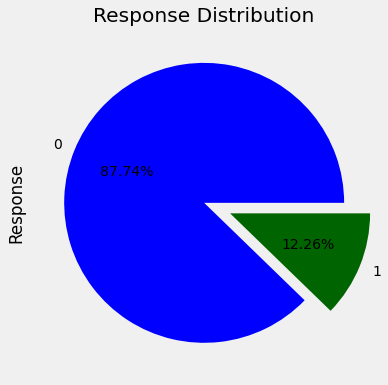

In [69]:
# checking the distribution of the dependent variable Response 
plt.figure(figsize = (8,6))
response_count.plot(kind  = 'pie' , explode =[0,0.2], colors = ['blue','darkgreen'] , autopct = '%.2f%%' )
plt.title('Response Distribution')
plt.show()


**Inference**

*   We can clearly see that the distribution of the dependent variable is highly imbalanced


> To tackle this we will use oversampling technique SMOTE





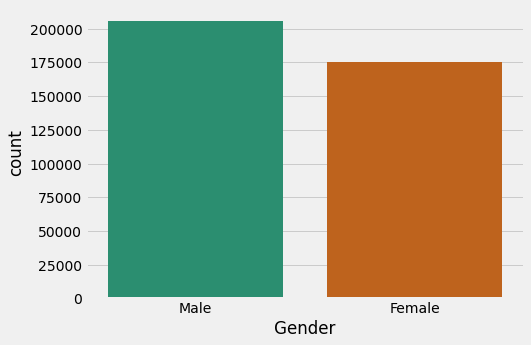

Male      206089
Female    175020
Name: Gender, dtype: int64

In [70]:
# Checking Distribution of gender
count_no_hue(df['Gender'], 'Dark2')

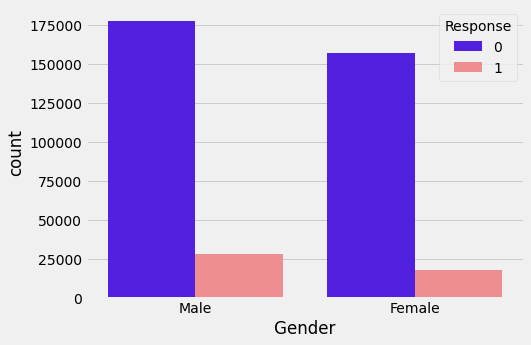

In [73]:
# Response according to gender
count_hue(df['Gender'],df['Response'],'gnuplot2')

**Inference**

*   There is slightly more chance of positive response if the customer is male




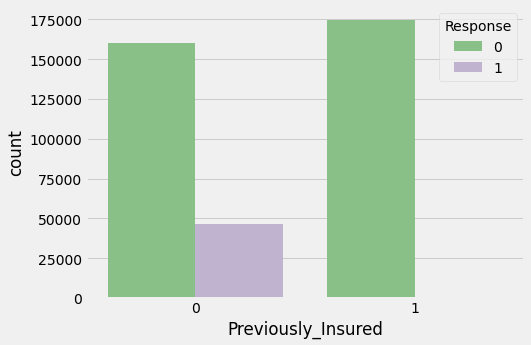

In [80]:
# Checking response with respect to previously insured
count_hue(df['Previously_Insured'],df['Response'],'Accent')

**Inference**


*   In the above plot we can clearly see that people already having vehicle insurance are not interested 




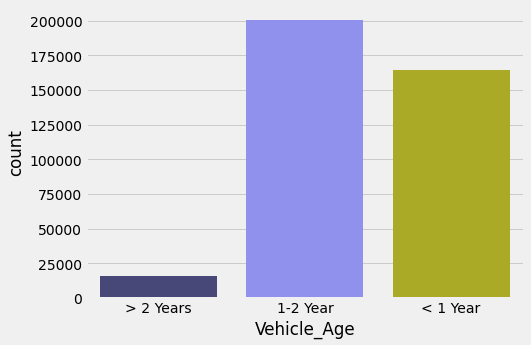

1-2 Year     200316
< 1 Year     164786
> 2 Years     16007
Name: Vehicle_Age, dtype: int64

In [75]:
# Checking the age group of the vehicles
count_no_hue(df['Vehicle_Age'],'gist_stern')

**Inference**


* Most people either have vehicle aged between 1-2 years or less than 1 years  


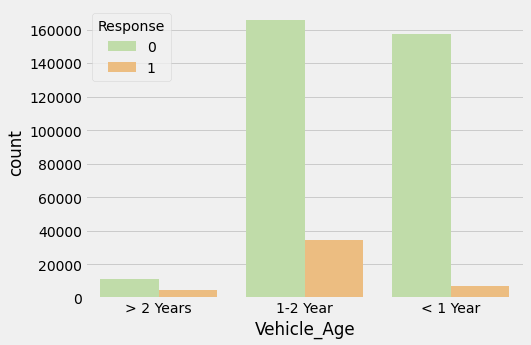

In [76]:
# Response with respect to vehicle age
count_hue(df['Vehicle_Age'],df['Response'],'Spectral_r')

**Inference**


* People having for 1-2 years are more likely to response  


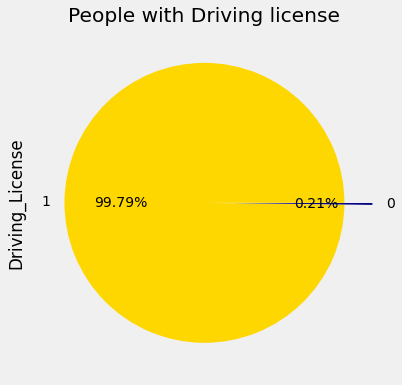

In [ ]:
license_count = df['Driving_License'].value_counts()
plt.figure(figsize = (8,6))
license_count.plot(kind  = 'pie' , explode =[0,0.2], colors = ['gold','navy'] , autopct = '%.2f%%' )
plt.title('People with Driving license')
plt.show()

**Inference**


*   Almost every person in the dataset haves Driving license


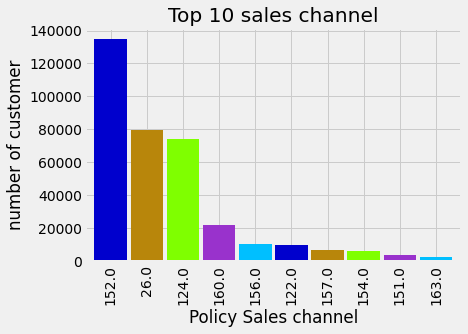

In [ ]:
# Let's see the top 10 policy sales channel
top_10_sales_channel = df['Policy_Sales_Channel'].value_counts().sort_values(ascending=False).iloc[:10]
color = ['mediumblue','darkgoldenrod','chartreuse','darkorchid','deepskyblue']
top_10_sales_channel.plot(kind = 'bar', color= color, width = 0.90)
plt.title('Top 10 sales channel')
plt.xlabel('Policy Sales channel')
plt.ylabel('number of customer')
plt.show()

**Inference**


*   In the above plot we can clearly see that policy  sales channel number 152.0 was able to reach most number customer 


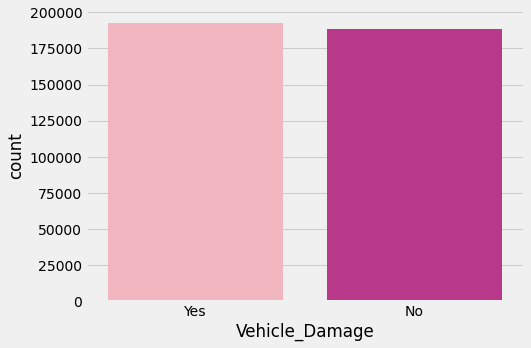

Yes    192413
No     188696
Name: Vehicle_Damage, dtype: int64

In [79]:
# Checking how many people vehicles were damaged in the past
count_no_hue(df['Vehicle_Damage'],'RdPu')

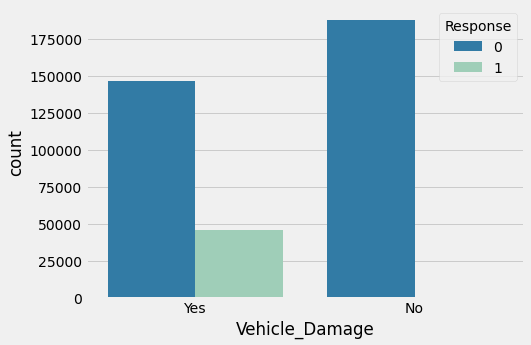

In [78]:
# Response with respect to Vehicle damage
count_hue(df['Vehicle_Damage'],df['Response'],'YlGnBu_r')

**Inference**


*  From above plot we can clearly infer that people whose vehicle got damaged in the past are more likely to be interested in vehicle insurance 


#  Creating copy of our dataset

In [4]:
# creating copy of dataset
copy_df = df.copy()

In [5]:
copy_df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


## Creating the dummy variables 




In [6]:
# Dropping columns(id , Driving license)
copy_df.drop(['id','Driving_License'] , axis = 1 , inplace = True)

In [9]:
# Encoding categorical columns 
copy_df = pd.get_dummies(copy_df , columns = ['Gender' , 'Vehicle_Age' , 'Vehicle_Damage'] , drop_first= True)

In [11]:
copy_df.head()

,Age,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Gender_Male,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years,Vehicle_Damage_Yes
0,44,28.0,0,40454.0,26.0,217,1,1,0,1,1
1,76,3.0,0,33536.0,26.0,183,0,1,0,0,0
2,47,28.0,0,38294.0,26.0,27,1,1,0,1,1
3,21,11.0,1,28619.0,152.0,203,0,1,1,0,0
4,29,41.0,1,27496.0,152.0,39,0,0,1,0,0


# **Implementing SMOTE**

In [12]:
# Creating Independent(X) and Dependent(Y) Variables
X = copy_df.drop('Response', axis = 1 )
Y = copy_df['Response']

In [9]:
X.shape

(381109, 10)

In [10]:
Y.shape

(381109,)

In [11]:
Y.value_counts()

0    334399
1     46710
Name: Response, dtype: int64

In [13]:
# implementing SMOTE  
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_smote , Y_smote = smote.fit_resample(X,Y)

In [14]:
Y_smote.value_counts()

1    334399
0    334399
Name: Response, dtype: int64

# **MODEL TRAINING**

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn.metrics import roc_auc_score, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

In [16]:
# Train Test Split
x_train,x_test,y_train,y_test = train_test_split(X_smote, Y_smote , test_size = 0.2 , random_state=0)

# **3. Random Forest**

In [56]:
# fitting on train set
rf_classifier = RandomForestClassifier() 
grid_values = {'n_estimators':[10,30,40,50,70, 90], 'max_depth':[3,5,7,9]}
rf_classifier = GridSearchCV(rf_classifier, param_grid = grid_values, scoring = 'roc_auc', cv=5)

rf_classifier.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [3, 5, 7, 9],
                         'n_estimators': [10, 30, 40, 50, 70, 90]},
             scoring='roc_auc')

In [57]:
rf_classifier.best_params_

{'max_depth': 9, 'n_estimators': 70}

In [58]:
# Predicting on test set
y_pred_rf = rf_classifier.predict(x_test)

In [59]:
# Evaluation metrics for Random forest
accuracy_rf = accuracy_score(y_test,y_pred_rf)
recall_rf  = recall_score(y_test,y_pred_rf)
precision_rf = precision_score(y_test,y_pred_rf)
roc_auc_rf = roc_auc_score(y_test ,y_pred_rf)



print('Accuracy :-',accuracy_rf)
print('Recall :-',recall_rf)
print('Precision :-',precision_rf)
print('Roc Auc Score :-',roc_auc_rf)

Accuracy :- 0.8325732655502392
Recall :- 0.9315671306690615
Precision :- 0.7773822460373965
Roc Auc Score :- 0.8326767692180259


In [61]:
# storing the result
dict1 = {'Model':'Random Forest',
          'Accuracy':accuracy_rf,
          'Recall':recall_rf,
          'Precision':precision_rf,
          'Roc_Auc_Score':roc_auc_rf}



results = pd.DataFrame(dict1,index = [1])            

# **2. Logistic Regression**

In [ ]:
# Fitting logistic regression on test dataset
log_reg = LogisticRegression()
log_reg.fit(x_train,y_train)

In [82]:
log_reg.score(x_train,y_train)

0.5882030809026648

In [83]:
log_reg.intercept_

array([0.00041254])

In [85]:
log_reg.coef_

array([[ 8.83244560e-03, -1.87123330e-03, -6.80321911e-02,
         2.73492268e-06, -7.88919944e-03,  1.99465752e-03,
        -1.96770681e-02, -4.02927746e-02, -2.58961429e-03,
         6.81424076e-02]])

In [84]:
# Testing the model on test set 
y_pred_log  = log_reg.predict(x_test)

In [86]:
# Checking evaluation metrics 
print('Accuracy :-',  accuracy_score(y_test,y_pred_log))
print('Recall :-',  recall_score(y_test,y_pred_log))
print('Precision :-',  precision_score(y_test,y_pred_log))
print('Roc Auc Score :-',  roc_auc_score(y_test,y_pred_log))

Accuracy :- 0.585930023923445
Recall :- 0.4677892531058225
Precision :- 0.6118202106417133
Roc Auc Score :- 0.585806501086145


In [87]:
# storing the results
dict2 = {'Model':'Logistic Regression',
          'Accuracy':round(accuracy_score(y_test,y_pred_log),4),
          'Recall':round(recall_score(y_test,y_pred_log),4),
          'Precision':round(precision_score(y_test,y_pred_log),4),
          'Roc_Auc_Score':round(roc_auc_score(y_test,y_pred_log),4)}


results = results.append(dict2,ignore_index = True)           

# **3. Decision Tree**

In [88]:
# Fitting Decision Tree on train set
dt_classifier = DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=10, random_state=0)
dt_classifier.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=10, random_state=0)

In [89]:
# Predicting y
y_pred_dt = dt_classifier.predict(x_test)

In [90]:
# Evaluation metrics of the model
accuracy = accuracy_score(y_test,y_pred_dt)
recall  = recall_score(y_test,y_pred_dt)
precision = precision_score(y_test,y_pred_dt)
roc_auc = roc_auc_score(y_test ,y_pred_dt)




print('Accuracy :-',accuracy)
print('Recall :-',recall)
print('Precision :-',precision)
print('Roc Auc Score :-',roc_auc)

Accuracy :- 0.8079694976076555
Recall :- 0.8651399491094147
Precision :- 0.7760889414039422
Roc Auc Score :- 0.8080292725382772


In [91]:
# storing the result
dict3 = {'Model':'Decision Tree',
          'Accuracy':accuracy,
          'Recall':recall,
          'Precision':precision,
          'Roc_Auc_Score':roc_auc}


results = results.append(dict3,ignore_index=True)

# **4. KNN**

In [92]:
# importing Knn
from sklearn.neighbors import KNeighborsClassifier

neighbors = np.arange(1,9)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    train_accuracy[i] = knn.score(x_train, y_train)    
    test_accuracy[i] = knn.score(x_test, y_test) 

In [94]:
# fiting KNN model
knn = KNeighborsClassifier(n_neighbors=7)
grid_values_knn = {'n_neighbors':[5,7,9,11]}
knn = GridSearchCV(knn, param_grid = grid_values_knn, scoring = 'roc_auc', cv=5)

knn.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_neighbors=7),
             param_grid={'n_neighbors': [5, 7, 9, 11]}, scoring='roc_auc')

In [95]:
knn.best_params_

{'n_neighbors': 5}

In [96]:
# Predicting on test set
y_pred_knn = knn.predict(x_test)

In [97]:
# evaluation metrics of knn
accuracy_knn = accuracy_score(y_test,y_pred_knn)
recall_knn  = recall_score(y_test,y_pred_knn)
precision_knn = precision_score(y_test,y_pred_knn)
roc_auc_knn = roc_auc_score(y_test ,y_pred_knn)



print('Accuracy :-',accuracy_knn)
print('Recall :-',recall_knn)
print('Precision :-',precision_knn)
print('Roc Auc Score :-',roc_auc_knn)

Accuracy :- 0.8122757177033493
Recall :- 0.9527465948211346
Precision :- 0.74355769455412
Roc Auc Score :- 0.8124225879258773


In [98]:
# storing the result
dict4 = {'Model':'KNN',
          'Accuracy':accuracy_knn,
          'Recall':recall_knn,
          'Precision':precision_knn,
          'Roc_Auc_Score':roc_auc_knn}


results = results.append(dict4 , ignore_index=True) 

# **5. Support Vector Machines**